# Imports

In [1]:
import os
import kagglehub
import pandas as pd
import numpy as pn

## Load the Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("benroshan/factors-affecting-campus-placement")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'factors-affecting-campus-placement' dataset.
Path to dataset files: /kaggle/input/factors-affecting-campus-placement


In [3]:
print(os.listdir(path))

['Placement_Data_Full_Class.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'Placement_Data_Full_Class.csv'))

## Explore the Data

In [5]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [25]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(215, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    int64  
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    int64  
 14  salary          148 non-null    float64
dtypes: float64(6), int64(4), object(5)
memory usage: 25.3+ KB


## Visuailization

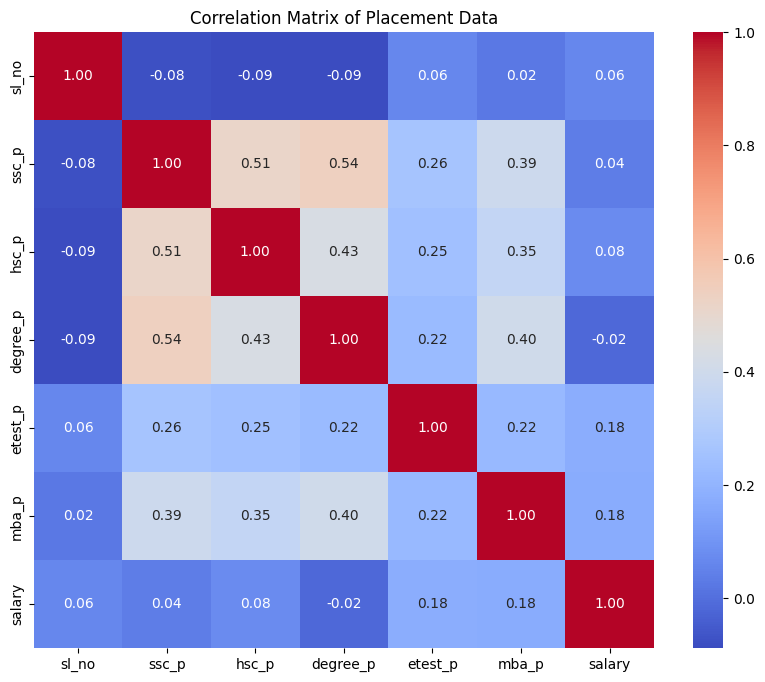

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Placement Data')
plt.show()

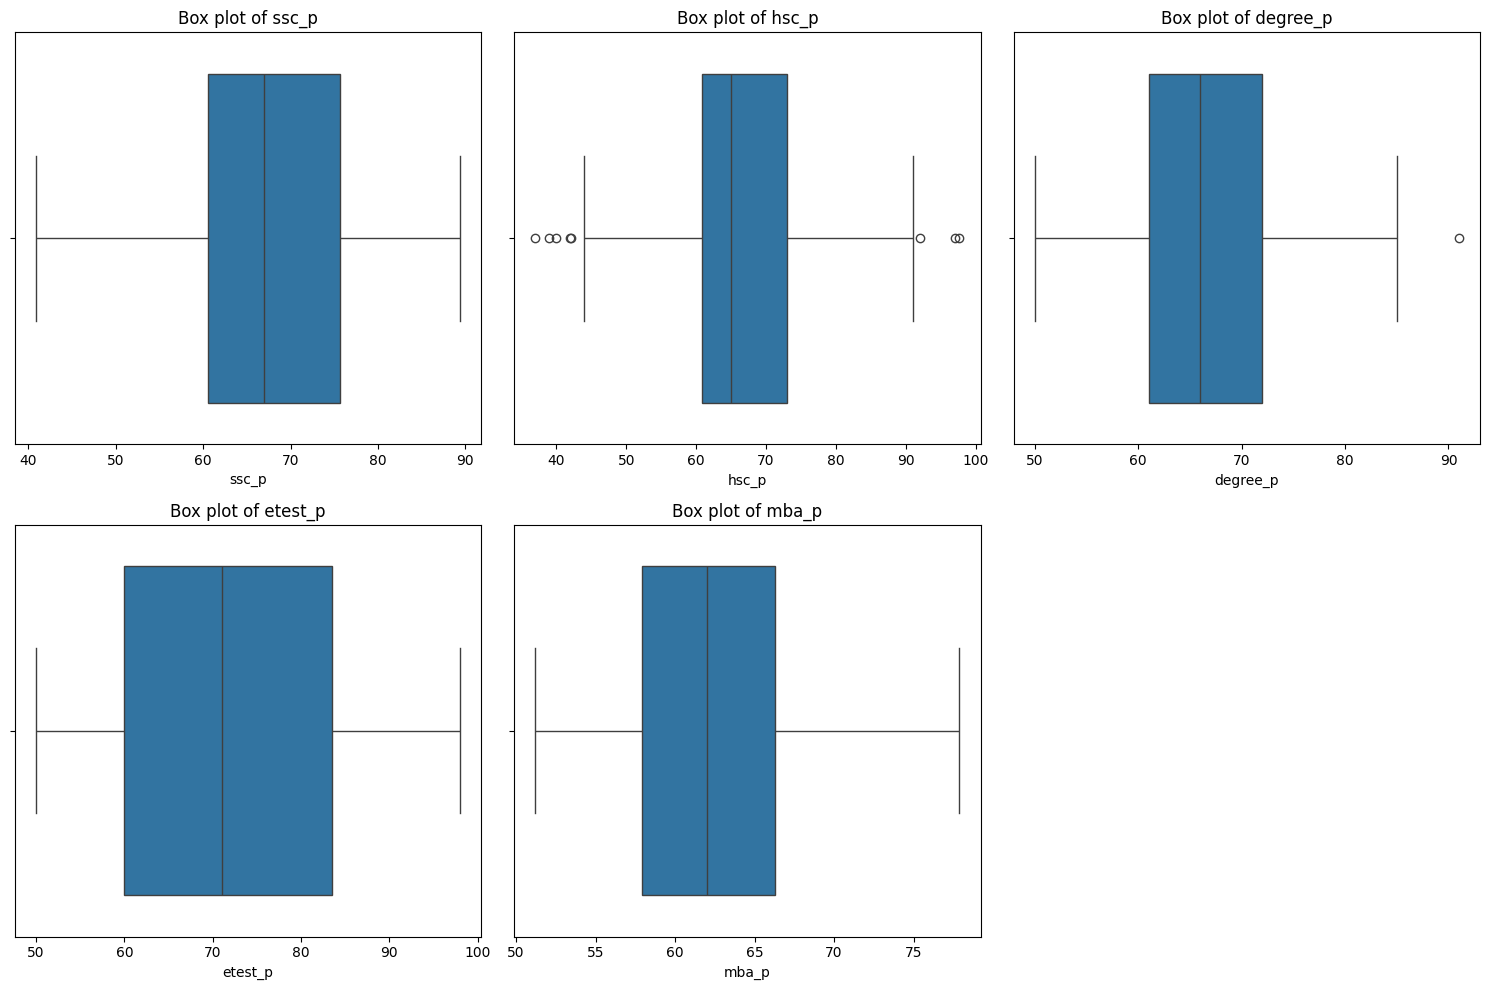

In [11]:
# Select numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=pn.number).columns.tolist()

# Remove the 'sl_no' and 'salary' columns as they are not relevant for outlier detection
numerical_cols.remove('sl_no')
if 'salary' in numerical_cols:
    numerical_cols.remove('salary')

# Create box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

## Preprocessing

In [37]:
df = df.drop('sl_no',axis=1)

In [21]:
columns_to_fill = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t','specialisation']

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mode()[0])

In [24]:
df['salary'] = df['salary'].fillna(df['salary'].median())

In [17]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0}).astype('int64')
df['workex'] = df['workex'].replace({'No': 1, 'Yes': 0}).astype('int64')
df['status'] = df['status'].replace({'Placed': 1, 'Not Placed': 0}).astype('int64')

/tmp/ipython-input-231851995.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['workex'] = df['workex'].replace({'No': 1, 'Yes': 0}).astype('int64')


In [26]:
# Select categorical columns for one-hot encoding (excluding 'gender' and 'status' which are already mapped)
categorical_cols_for_encoding = ['ssc_b', 'hsc_b', 'hsc_s', 'degree_t','specialisation']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols_for_encoding, dtype=int)

# Display the first few rows to see the changes
display(df.head())

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,...,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,1,67.00,91.00,58.00,1,55.0,58.80,1,270000.0,...,0,1,0,1,0,0,0,1,0,1
1,2,1,79.33,78.33,77.48,0,86.5,66.28,1,200000.0,...,0,1,0,0,1,0,0,1,1,0
2,3,1,65.00,68.00,64.00,1,75.0,57.80,1,250000.0,...,1,0,1,0,0,1,0,0,1,0
3,4,1,56.00,52.00,52.00,1,66.0,59.43,0,265000.0,...,1,0,0,0,1,0,0,1,0,1
4,5,1,85.80,73.60,73.30,1,96.8,55.50,1,425000.0,...,1,0,0,1,0,1,0,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sl_no                   215 non-null    int64  
 1   gender                  215 non-null    int64  
 2   ssc_p                   215 non-null    float64
 3   hsc_p                   215 non-null    float64
 4   degree_p                215 non-null    float64
 5   workex                  215 non-null    int64  
 6   etest_p                 215 non-null    float64
 7   mba_p                   215 non-null    float64
 8   status                  215 non-null    int64  
 9   salary                  215 non-null    float64
 10  ssc_b_Central           215 non-null    int64  
 11  ssc_b_Others            215 non-null    int64  
 12  hsc_b_Central           215 non-null    int64  
 13  hsc_b_Others            215 non-null    int64  
 14  hsc_s_Arts              215 non-null    in

# Train Test Split

In [48]:
X = df.drop(columns=['status'])
y = df[['status']]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,y,
                                                     train_size =0.75,
                                                     random_state= 42
)

In [50]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the first few rows of the scaled training data
display(X_train[:5])

array([[ 0.        , -0.56666667, -2.        , -0.6       ,  0.        ,
         0.08695652, -0.36013986,  0.        , -1.        ,  1.        ,
         0.        ,  0.        ,  0.        , -1.        ,  1.        ,
         0.        ,  0.        ,  0.        , -1.        ,  1.        ],
       [ 0.        , -0.3       ,  0.16      , -0.7       ,  0.        ,
         0.26086957, -1.23659674,  0.        ,  0.        ,  0.        ,
         1.        , -1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.43333333,  0.16      ,  0.5       , -1.        ,
        -0.89217391,  1.86363636, -1.03571429, -1.        ,  1.        ,
         0.        ,  0.        ,  1.        , -1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.43333333,  0.64      ,  0.1       , -1.        ,
        -0.04347826,  0.71911422,  0.35714286,  

# Basic Model

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RF = RandomForestClassifier(n_estimators=500, max_depth=4)

RF.fit(X_train,y_train)

y_pred = RF.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [54]:
from sklearn.metrics import accuracy_score, classification_report

# Separate the actual 'status'
y_test_status = y_test['status']

# y_pred contains the predicted 'status' values from the RandomForestClassifier
y_pred_status = y_pred

# --- Classification Evaluation (for 'status') ---
print("Classification Report for 'status':")
print(classification_report(y_test_status, y_pred_status))

accuracy = accuracy_score(y_test_status, y_pred_status)
print(f"Accuracy for 'status': {accuracy:.4f}")

Classification Report for 'status':
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        14
           1       0.85      1.00      0.92        40

    accuracy                           0.87        54
   macro avg       0.93      0.75      0.79        54
weighted avg       0.89      0.87      0.85        54

Accuracy for 'status': 0.8704


## Multi output learning Predicting salary, status both classes

In [58]:
x = df.drop(["salary", "status"], axis=1)
y_reg = df["salary"]      # regression target
y_clf = df["status"]      # classification target

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_clf, test_size=0.2, random_state=42)


A. Regression (Salary)

In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Base models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Voting
voting_reg = VotingRegressor([('rf', rf), ('gb', gb)])
voting_reg.fit(X_train, y_train_reg)

# Stacking
stack_reg = StackingRegressor(
    estimators=[('rf', rf), ('gb', gb)],
    final_estimator=GradientBoostingRegressor(random_state=42)
)
stack_reg.fit(X_train, y_train_reg)

# Evaluate
for name, model in [("Voting", voting_reg), ("Stacking", stack_reg)]:
    pred = model.predict(X_test)
    print(f"\n{name} — R²: {r2_score(y_test_reg, pred):.4f} | RMSE: {np.sqrt(mean_squared_error(y_test_reg, pred)):.4f}")



Voting — R²: 0.9981 | RMSE: 3334.1828

Stacking — R²: 0.7518 | RMSE: 38295.2217


B. Classification (Placement Status)

In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_c = RandomForestClassifier(random_state=42)
gb_c = GradientBoostingClassifier(random_state=42)

# --- Voting ---
voting_clf = VotingClassifier(
    estimators=[('rf', rf_c), ('gb', gb_c)],
    voting='soft'
)
voting_clf.fit(X_train_c, y_train_c)

# --- Stacking ---
stack_clf = StackingClassifier(
    estimators=[('rf', rf_c), ('gb', gb_c)],
    final_estimator=GradientBoostingClassifier(random_state=42)
)
stack_clf.fit(X_train_c, y_train_c)

# Evaluate
for name, model in [("Voting", voting_clf), ("Stacking", stack_clf)]:
    pred = model.predict(X_test_c)
    print(f"\n{name} — Accuracy: {accuracy_score(y_test_c, pred):.4f} | F1: {f1_score(y_test_c, pred, average='weighted'):.4f}")



Voting — Accuracy: 0.9767 | F1: 0.9770

Stacking — Accuracy: 0.9535 | F1: 0.9535


## Multi output learning results

In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

# === Regression predictions ===
y_pred_voting_reg = voting_reg.predict(X_test)
y_pred_stacking_reg = stack_reg.predict(X_test)

# === Classification predictions ===
y_pred_voting_clf = voting_clf.predict(X_test_c)
y_pred_stacking_clf = stack_clf.predict(X_test_c)

# === Calculate metrics ===
results = [
    ["Regression (Salary)", "Voting",
     round(r2_score(y_test_reg, y_pred_voting_reg), 4),
     round(np.sqrt(mean_squared_error(y_test_reg, y_pred_voting_reg)), 4),
     "-", "-"],

    ["Regression (Salary)", "Stacking",
     round(r2_score(y_test_reg, y_pred_stacking_reg), 4),
     round(np.sqrt(mean_squared_error(y_test_reg, y_pred_stacking_reg)), 4),
     "-", "-"],

    ["Classification (Placement Status)", "Voting",
     "-", "-",
     round(accuracy_score(y_test_c, y_pred_voting_clf), 4),
     round(f1_score(y_test_c, y_pred_voting_clf, average='weighted'), 4)],

    ["Classification (Placement Status)", "Stacking",
     "-", "-",
     round(accuracy_score(y_test_c, y_pred_stacking_clf), 4),
     round(f1_score(y_test_c, y_pred_stacking_clf, average='weighted'), 4)]
]

# === Create DataFrame ===
final_df = pd.DataFrame(results, columns=["Task", "Model", "R²", "RMSE", "Accuracy", "F1 Score"])
print("=== Combined Model Performance ===")
display(final_df)


=== Combined Model Performance ===


,Task,Model,R²,RMSE,Accuracy,F1 Score
0,Regression (Salary),Voting,0.9981,3334.1828,-,-
1,Regression (Salary),Stacking,0.7518,38295.2217,-,-
2,Classification (Placement Status),Voting,-,-,0.9767,0.977
3,Classification (Placement Status),Stacking,-,-,0.9535,0.9535


##  Final Conclusion

- Implemented a **Multi-Target Ensemble System** that predicts both:
  - 🎯 **Salary (Regression)**
  - 🧩 **Placement Status (Classification)**
- **Voting Ensemble** proved superior overall, achieving:
  - R² = 0.9981 for Salary Prediction  
  - Accuracy = 0.9767 for Placement Status  
- This demonstrates how a shared feature base can power both regression & classification outcomes effectively.

🧠 *Next Steps:*  
- Perform cross-validation to confirm stability.  
- Add feature scaling & regularization to reduce possible overfit in regression.

💡 *If you learned something new, don’t forget to ⭐ star or upvote!*
